# 5.2. Implementation of Multilayer Perceptrons



__Multilayer perceptrons (MLPs)__

Os perceptrons multicamadas (MLPs) não são muito mais complexos de implementar do que modelos lineares simples. A principal diferença conceitual é que agora concatenamos múltiplas camadas.

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

# 5.2.1. Implementação do zero

# 5.2.1.1. Inicializando parâmetros do modelo

Fashion-MNIST contém 10 classes
28 x 28 = 784 valores

784 features de entrada

MLP com uma camada oculta e 256 unidades ocultas.

Tanto o número de camadas quanto sua largura são ajustáveis (são considerados hiperparâmetros).
Normalmente, escolhemos que as larguras das camadas sejam divisíveis por potências maiores de 2.

Novamente, representaremos nossos parâmetros com vários tensores. 

Observe que para cada camada , devemos controlar uma matriz de pesos e um vetor de polarização

Como sempre, alocamos memória para os gradientes de perda em relação a esses parâmetros.

No código abaixo usamos nn.Parameter para registrar automaticamente um atributo de classe como um parâmetro a ser rastreado (autograd).



In [2]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

# 5.2.1.2. Modelo

Para ter certeza de que sabemos como tudo funciona, implementaremos nós mesmos a ativação do ReLU, em vez de invocar a relufunção integrada diretamente.

In [3]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [4]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))          # converte a entrada 28 x 28 em uma entrada 1 x 784 
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

# 5.2.1.3. Treinamento

Felizmente, o ciclo de treinamento para MLPs é exatamente o mesmo da regressão softmax. Definimos o modelo, os dados e o treinador e, finalmente, invocamos o fit método no modelo e nos dados.

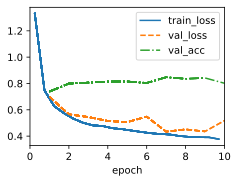

In [5]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

Definimos métodos forward para os modelos transformarem a entrada usando os parâmetros do modelo. Essas operações são essencialmente um pipeline: você pega uma entrada e aplica uma transformação (por exemplo, multiplicação de matrizes com pesos seguida de adição de polarização) e, em seguida, usa repetidamente a saída da transformação atual como entrada para a próxima transformação. 

# Código Agrupado

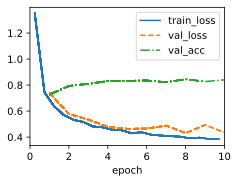

In [6]:
import torch
from torch import nn
from d2l import torch as d2l

# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)
# ------------------------------------------------------------------------------------


def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)


class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)     # pesos são iniciados com valores aleatórios em uma distribuição normal
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))                         # bias (b) são iniciados com valores nulos
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)    # pesos são iniciados com valores aleatórios em uma distribuição normal
        self.b2 = nn.Parameter(torch.zeros(num_outputs))                         # bias (b) são iniciados com valores nulos
        # nn.Parameter: determina quais variáveis serão consideradas parâmetros dentro do modelo.
    
    def forward(self, X):
        X = X.reshape((-1, self.num_inputs))          # converte a entrada 28 x 28 em uma entrada 1 x 784. Equivalente ao nn.Flatten(). 
        H = relu(torch.matmul(X, self.W1) + self.b1)  # Equivalente ao nn.ReLU(  nn.LazyLinear(num_hiddens)   ). 
        return torch.matmul(H, self.W2) + self.b2

model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)


In [ ]:
y_hat = model(data.val.data.type(torch.float32)) 
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

# 5.2.2. Implementação concisa

Como seria de esperar, contando com APIs de alto nível, podemos implementar MLPs de forma ainda mais concisa.



# 5.2.2.1. Modelo e Treinamento

acc: 0.81


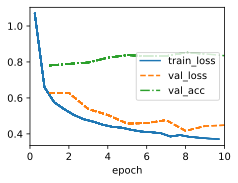

In [1]:
import torch
from torch import nn
from d2l import torch as d2l



# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)

# ------------------------------------------------------------------------------------
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), #reshape:(28 x 28) para (1 x 784) # Flatten = Achatar. Equivalente a: X=X.reshape((-1, self.num_inputs))
                                 nn.LazyLinear(out_features = num_hiddens), # camada escondida. Ainda é Linear. 
                                                                            # LazyLinear(linear preguiçosa=sem parâmetros de entrada, apenas de saída.)
                                 nn.ReLU(),                    # função de ativação. Converte a função em não Linear.
                                 nn.LazyLinear(out_features = num_outputs))   # camada de saída


# 5.2.2.2. Treinamento
# O ciclo de treinamento é exatamente o mesmo de quando implementamos a regressão softmax.
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)   # lr é o learning rate
trainer = d2l.Trainer(max_epochs=10)
data = d2l.FashionMNIST(batch_size=256)
trainer.fit(model, data)


y_hat = model(data.val.data.type(torch.float32))                          # dados de validação entrando no modelo treinado.
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')        # acurácia do modelo treinado.

__Hiperparâmetros otimizáveis:__

- taxa de aprendizado,
- número de épocas,
- número de camadas ocultas e
- número de unidades ocultas (neurônios) por camada.

# Exercícios:

# Ex. 1
Altere o número de unidades ocultas num_hiddense represente como seu número afeta a precisão do modelo. Qual é o melhor valor deste hiperparâmetro?

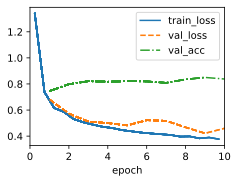

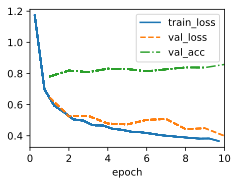

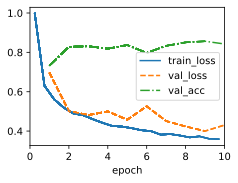

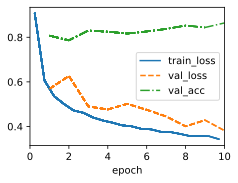

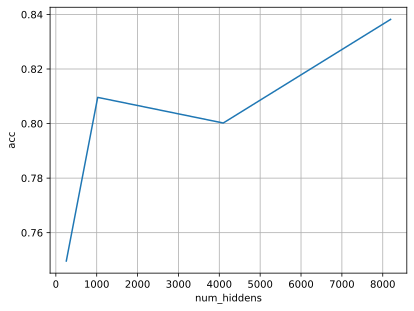

In [9]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)
# ------------------------------------------------------------------------------------


def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)


class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

    def forward(self, X):
        X = X.reshape((-1, self.num_inputs))          # converte a entrada 28 x 28 em uma entrada 1 x 784
        H = relu(torch.matmul(X, self.W1) + self.b1)
        return torch.matmul(H, self.W2) + self.b2

# ----------------------------------------------------------------------------

data = d2l.FashionMNIST(batch_size=256)

def stat_acc(num_hiddens):
    model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=num_hiddens, lr=0.1)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32))
    return model.accuracy(y_hat,data.val.targets).item()  # Função de Classifier.accuracy de MLPScratch()

# ----------------------------------------------------------------------------
accs = []
hiddens = [256, 1024, 4096, 8192]

for num_hiddens in hiddens:
    accs.append(stat_acc(num_hiddens))

plt.figure(5)
d2l.plot(hiddens,accs,'num_hiddens','acc')


# model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
# data = d2l.FashionMNIST(batch_size=256)
# trainer = d2l.Trainer(max_epochs=10)
# trainer.fit(model, data)



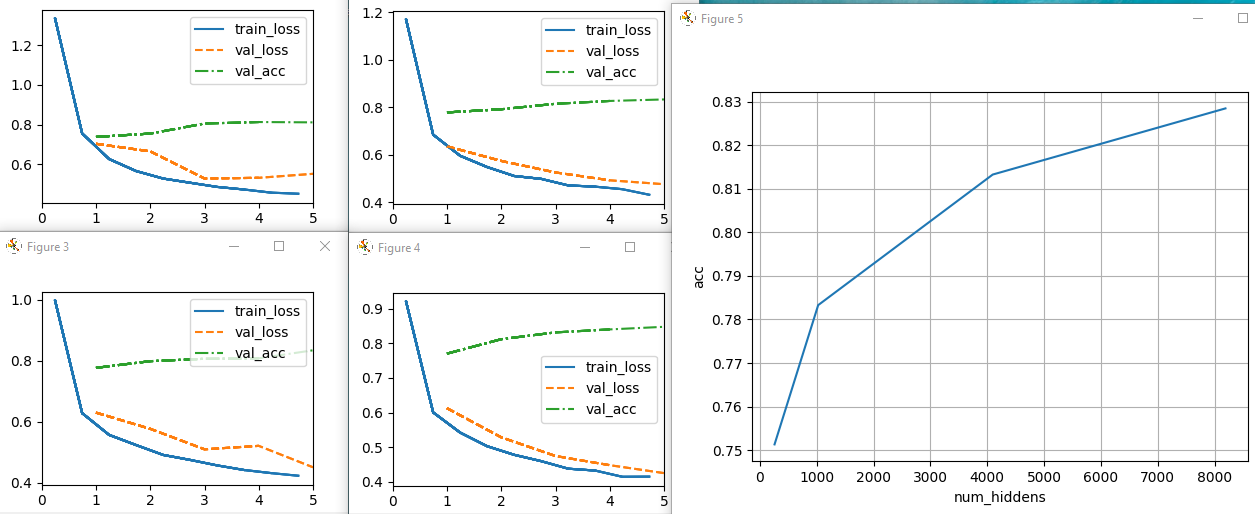
hiddens = [256, 1024, 4096, 8192]

# Ex. 2
Tente adicionar uma camada oculta para ver como isso afeta os resultados.

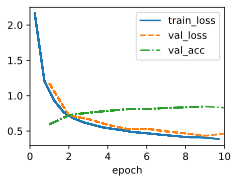

In [10]:
import torch
from torch import nn
from d2l import torch as d2l


# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)
# ------------------------------------------------------------------------------------


def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)


class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_hiddens) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_hiddens))
        self.W3 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b3 = nn.Parameter(torch.zeros(num_outputs))

    def forward(self, X):
        X = X.reshape((-1, self.num_inputs))          # converte a entrada 28 x 28 em uma entrada 1 x 784
        H1 = relu(torch.matmul(X, self.W1) + self.b1)
        H2 = relu(torch.matmul(H1, self.W2) + self.b2)
        return torch.matmul(H2, self.W3) + self.b3

model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)


In [11]:
y_hat = model(data.val.data.type(torch.float32)) 
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

acc: 0.77


Alterando o número de unidades ocultas (neurônios): num_hiddens=[256,128]

acc: 0.81


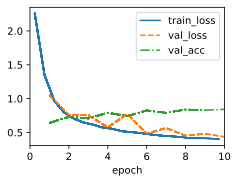

In [13]:
import torch
from torch import nn
from d2l import torch as d2l


# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)
# ------------------------------------------------------------------------------------


def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)


class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens[0]) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens[0]))
        self.W2 = nn.Parameter(torch.randn(num_hiddens[0], num_hiddens[1]) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_hiddens[1]))
        self.W3 = nn.Parameter(torch.randn(num_hiddens[1], num_outputs) * sigma)
        self.b3 = nn.Parameter(torch.zeros(num_outputs))

    def forward(self, X):
        X = X.reshape((-1, self.num_inputs))          # converte a entrada 28 x 28 em uma entrada 1 x 784
        H1 = relu(torch.matmul(X, self.W1) + self.b1)
        H2 = relu(torch.matmul(H1, self.W2) + self.b2)
        return torch.matmul(H2, self.W3) + self.b3

model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=[256,128], lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)


y_hat = model(data.val.data.type(torch.float32))
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

# Utilizando a forma concisa

acc: 0.81


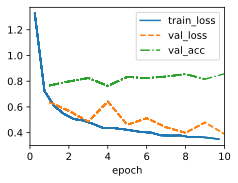

In [16]:
import torch
from torch import nn
from d2l import torch as d2l


# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)
# ------------------------------------------------------------------------------------


class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()

        self.net = nn.Sequential(
        nn.Flatten(),                                # RESHAPE
        nn.LazyLinear(num_hiddens[0]), nn.ReLU(),    # CAMADA ESCONDIDA 1
        nn.LazyLinear(num_hiddens[1]), nn.ReLU(),    # CAMADA ESCONDIDA 2
        nn.LazyLinear(num_outputs))                  # CAMADA DE SAÍDA  

        # MAIS ELABORADO:
        # layers = [nn.Flatten()]
        # for num in num_hiddens:
        #     layers.append(nn.LazyLinear(num))
        #     layers.append(nn.ReLU())
        # layers.append(nn.LazyLinear(num_outputs))
        # self.net = nn.Sequential(*layers)

# 5.2.2.2. Treinamento
# O ciclo de treinamento é exatamente o mesmo de quando implementamos a regressão softmax.
model = MLP(num_outputs=10, num_hiddens=[256,128], lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
data = d2l.FashionMNIST(batch_size=256)
trainer.fit(model, data)


y_hat = model(data.val.data.type(torch.float32))
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

# Ex. 4
Como a mudança na taxa de aprendizagem altera seus resultados? Com todos os outros parâmetros fixos, qual taxa de aprendizado oferece os melhores resultados? Como isso se relaciona com o número de épocas?


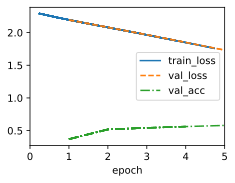

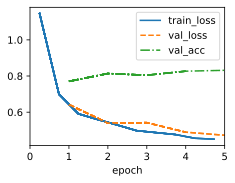

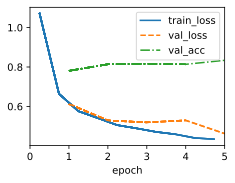

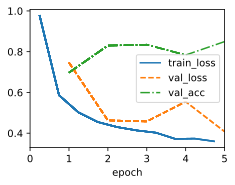

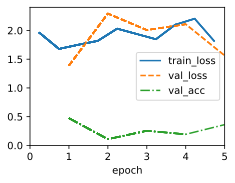

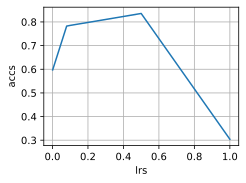

In [17]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt


# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)
# ------------------------------------------------------------------------------------



class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),                 # reshape: (28 x 28) para (1 x 784)
                                 nn.LazyLinear(num_hiddens),   # camada escondida
                                 nn.ReLU(),                    # função de ativação
                                 nn.LazyLinear(num_outputs))   # camada de saída


lrs = [0.001, 0.08, 0.1, 0.5, 1]
accs = []

data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=5)

for lr in lrs:
    # 5.2.2.2. Treinamento
    # O ciclo de treinamento é exatamente o mesmo de quando implementamos a regressão softmax.
    model = MLP(num_outputs=10, num_hiddens=256, lr=lr)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32))
    acc = model.accuracy(y_hat,data.val.targets).item()
    accs.append(acc)

plt.figure(6)
d2l.plot(lrs,accs,'lrs','accs')

# Ex. 6
Compare the speed of the framework and the from-scratch implementation for a challenging problem. How does it change with the complexity of the network?

Complex Network:
In the case of complex architectures like deep convolutional networks or large-scale recurrent networks, the gap in speed between the framework and from-scratch implementation can be substantial. The deep learning framework’s low-level optimizations, automatic differentiation, and GPU acceleration can provide a significant advantage, enabling faster training and convergence.

In summary, deep learning frameworks like PyTorch are designed to optimize training efficiency and provide a balance between performance and flexibility. They leverage hardware acceleration, automatic differentiation, and optimizations to significantly speed up the training process, especially for complex network architectures. A from-scratch implementation, on the other hand, might offer more customization but can be significantly slower, especially for challenging problems involving complex networks.

# Diferença entre Bibliotecas, Framework e API:
https://www.youtube.com/watch?v=bhE9cpG66DI

Biblioteca - pacote de códigos com função específica, por exemplo, criar gráfico. Elimina retrabalho.

Framework de software compreende de um conjunto de classes/bibliotecas implementadas em uma linguagem de programação específica, usadas para auxiliar o desenvolvimento de software. "Conjunto de bibliotecas" com objetivo comum, por exemplo, criar sites: Framework Flask, Django.

API - faz interações online com determinado serviço: cotação de moeda, CEP, youtube. Serve para pegar e enviar informações. Serve para integar seu código com um sistema (ou banco de dados) online.


# Ex. 7 
Meça a velocidade das multiplicações de tensor-matriz para matrizes bem alinhadas e desalinhadas. Por exemplo, teste matrizes com dimensões 1024, 1025, 1026, 1028 e 1032.

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
import time


inicio = time.time()

# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)
# ------------------------------------------------------------------------------------


def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)


class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))


    def forward(self, X):
        X = X.reshape((-1, self.num_inputs))          # converte a entrada 28 x 28 em uma entrada 1 x 784
        H = relu(torch.matmul(X, self.W1) + self.b1)
        return torch.matmul(H, self.W2) + self.b2


model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=1032, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=1)
trainer.fit(model, data)

fim = time.time()
tempo_gasto = fim - inicio

A medição do tempo direto na função def forward(self, X) retornou apenas valores nulos.

num_hiddens=1024
tempo_gasto=14.76

num_hiddens=1025
tempo_gasto=15.74

num_hiddens=1026
tempo_gasto=16.86

num_hiddens=1028
tempo_gasto=15.26

num_hiddens=1032
tempo_gasto=15.82

# Ex. 8
Experimente diferentes funções de ativação. Qual deles funciona melhor?

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
import time


inicio = time.time()

# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)
# ------------------------------------------------------------------------------------

class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))


    def forward(self, X):
        X = X.reshape((-1, self.num_inputs))          # converte a entrada 28 x 28 em uma entrada 1 x 784
        H = torch.relu(torch.matmul(X, self.W1) + self.b1)
        # H = torch.sigmoid(torch.matmul(X, self.W1) + self.b1)
        # H = torch.tanh(torch.matmul(X, self.W1) + self.b1)
        return torch.matmul(H, self.W2) + self.b2


model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

y_hat = model(data.val.data.type(torch.float32))
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

fim = time.time()
tempo_gasto = fim - inicio

torch.relu: \
tempo_gasto=73.23 \
acc=0.78 \
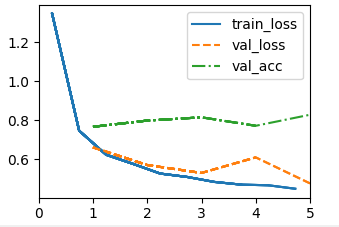

torch.sigmoid: \
tempo_gasto=75.37 \
acc=0.68 \
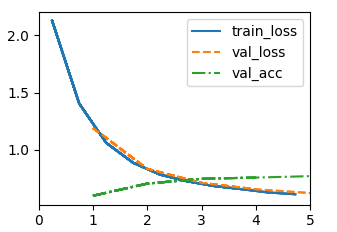

torch.tanh: \
tempo_gasto=71.23 \
acc=0.74 \
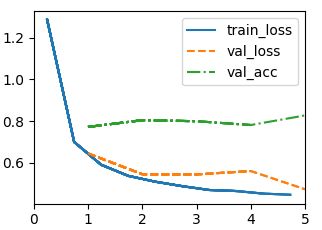

Utilizando o código conciso (framework):

0: nn.ReLU(), 1: nn.Sigmoid(), 2: nn.Tanh(), 3: nn.LeakyReLU(negative_slope=0.01), 4: nn.PReLU(num_parameters=1)


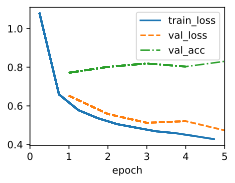

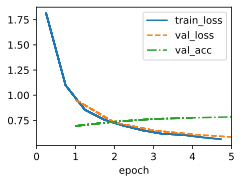

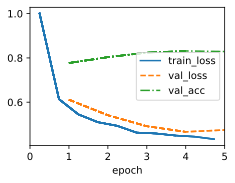

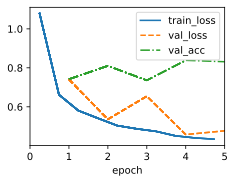

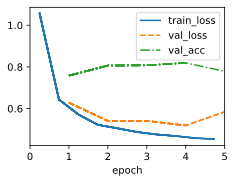

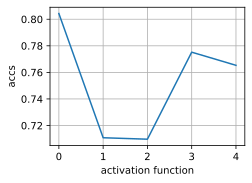

In [19]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)
# ------------------------------------------------------------------------------------




class MLP2(d2l.Classifier):

    def __init__(self, num_outputs, num_hiddens, lr, ativa):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),                 # reshape: (28 x 28) para (1 x 784)
                                 nn.LazyLinear(num_hiddens),   # camada escondida
                                 ativa,                        # função de ativação
                                 nn.LazyLinear(num_outputs))   # camada de saída



acts = [nn.ReLU(), nn.Sigmoid(), nn.Tanh(), nn.LeakyReLU(negative_slope=0.01),
        nn.PReLU(num_parameters=1)]
accs = []

trainer = d2l.Trainer(max_epochs=5)
data = d2l.FashionMNIST(batch_size=256)

for ativa in acts:
    model = MLP2(num_outputs=10, num_hiddens=256, lr=0.1, ativa=ativa)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32))
    acc = model.accuracy(y_hat,data.val.targets).item()
    accs.append(acc)


plt.figure(6)
x = np.arange(0,len(acts),1)
d2l.plot(x,accs,'activation function','accs')

print('0: nn.ReLU(), '
      '1: nn.Sigmoid(), '
      '2: nn.Tanh(), '
      '3: nn.LeakyReLU(negative_slope=0.01), '
      '4: nn.PReLU(num_parameters=1)')

# Ex. 9
Existe uma diferença entre as inicializações de peso da rede? Isso importa?

Yes, there is a significant difference between weight initializations in a neural network, and it does matter. Weight initialization plays a crucial role in the convergence speed and stability of training, as well as the overall performance of a neural network.

Common weight initialization methods include Xavier/Glorot initialization, He initialization, uniform initialization, and normal initialization. The specific choice of initialization method depends on the network architecture, the activation functions used, and the problem domain.

# Pesos inicializados com distribuição normal:

torch.normal ao invés de torch.randn (valores aleatórios em uma distribuição uniform)

acc: 0.80


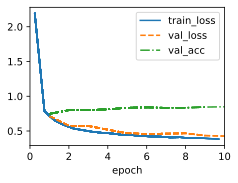

In [20]:
import torch
from torch import nn
from d2l import torch as d2l
import time

inicio = time.time()


# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)
# ------------------------------------------------------------------------------------


def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)


class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        # self.W1 = nn.Parameter()
        self.W1 = nn.Parameter(torch.normal(0.01, sigma, size=(num_inputs, num_hiddens)))
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))                         # bias (b) são iniciados com valores nulos
        self.W2 = nn.Parameter(torch.normal(0.01, sigma, size=(num_hiddens, num_outputs)))
        self.b2 = nn.Parameter(torch.zeros(num_outputs))                         # bias (b) são iniciados com valores nulos


    def forward(self, X):
        X = X.reshape((-1, self.num_inputs))          # converte a entrada 28 x 28 em uma entrada 1 x 784
        H = relu(torch.matmul(X, self.W1) + self.b1)
        return torch.matmul(H, self.W2) + self.b2

model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

y_hat = model(data.val.data.type(torch.float32))
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

fim = time.time()
tempo_gasto = fim - inicio

Outras distribuições: \
https://pytorch.org/docs/stable/nn.init.html

acc: 0.85


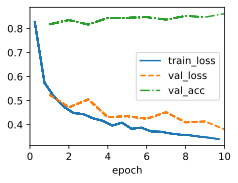

In [24]:
# Xavier uniform distribution

import torch
from torch import nn
from d2l import torch as d2l
import time

inicio = time.time()


# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)
# ------------------------------------------------------------------------------------


def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)


class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        # self.W1 = nn.Parameter()
        w1 = torch.empty(num_inputs, num_hiddens)
        self.W1 = nn.Parameter(nn.init.xavier_uniform_(w1, gain=nn.init.calculate_gain('relu')))
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))                         # bias (b) são iniciados com valores nulos

        w2 = torch.empty(num_hiddens, num_outputs)
        self.W2 = nn.Parameter(nn.init.xavier_uniform_(w2, gain=nn.init.calculate_gain('relu')))
        self.b2 = nn.Parameter(torch.zeros(num_outputs))                         # bias (b) são iniciados com valores nulos


    def forward(self, X):
        X = X.reshape((-1, self.num_inputs))          # converte a entrada 28 x 28 em uma entrada 1 x 784
        H = relu(torch.matmul(X, self.W1) + self.b1)
        return torch.matmul(H, self.W2) + self.b2

model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

y_hat = model(data.val.data.type(torch.float32))
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

fim = time.time()
tempo_gasto = fim - inicio

# Outras respostas:

https://pandalab.me/archives/implementation_of_multilayer_perceptrons#is-there-a-difference-between-weight-initializations-of-the-network-does-it-matter